# Advent of Code 2023
## Day 06: Template

### Puzzle
https://adventofcode.com/2023/day/6

### Answers
T1:  
T2:  

P1:  
P2:  


In [1]:
import re

In [2]:
test="""Time:      7  15   30
Distance:  9  40  200
"""

In [3]:
puzzle = """Time:        46     85     75     82
Distance:   208   1412   1257   1410"""

In [4]:
def get_data(lines):
    times = list(map(int, re.findall("(\d+)\s*", lines[0])))
    distance = list(map(int, re.findall("(\d+)\s*", lines[1])))
    return list(zip(times, distance))


# data = get_data(test.split('\n'))
data = get_data(puzzle.split('\n'))
print(data)

[(46, 208), (85, 1412), (75, 1257), (82, 1410)]


In [5]:
speed_start = 0

# Don't hold - travel = 0 distance
# Hold 1 - travel then 1mm/ms for next 6ms == 6mm
distance_to_beat = 9
time_available = 7
def ways_to_win(time_available, distance_to_beat):
    winning = []
    for time_held in range(1, time_available):
        time_remaining = time_available - time_held
        speed = time_held
        distance = time_remaining * speed
        if is_win := distance > distance_to_beat:
            # print(f"{time_held} -> {distance} / {distance_to_beat} (win)")
            winning.append((speed, distance))
        
    return winning

ways = []
for race in data:
    ways.append(ways_to_win(race[0], race[1]))

from math import prod
def calculate_ways_to_beat_record(ways):
    return prod([len(way) for way in ways])

calculate_ways_to_beat_record(ways)

1108800

### Part 2

In [6]:
time_available = int("".join([str(i[0]) for i in data]))
distance_to_beat = int("".join([str(i[1]) for i in data]))

print(f"Time available: {time_available}")
print(f"Distance to beat: {distance_to_beat}")

Time available: 46857582
Distance to beat: 208141212571410


In [7]:
def is_winning(time_held, time_available, distance_to_beat):
    time_remaining = time_available - time_held
    speed = time_held
    distance = time_remaining * speed
    return (distance > distance_to_beat) and (time_held < time_available)

def guess_min(guess, time_available, distance_to_beat, direction):
    boundary_check = sum([is_winning(guess + t, time_available, distance_to_beat) for t in range(-1, 2)])
    a = 0
    b = 0
    
    while(not(boundary_check == 2)):
        if boundary_check < 2:
            a = guess
        elif boundary_check == 3:
            b = guess
        
        guess = (a+b)//2
        boundary_check = sum([is_winning(guess + t, time_available, distance_to_beat) for t in range(-1, 2)])

    return guess




# Meh!  this is a total hack.  Needs improvement!
# Will rework when I have time
time_min = guess_min(time_available//2, time_available, distance_to_beat, -1)
time_max = guess_min(time_available, time_available, distance_to_beat, -1)

print(time_min)
print(time_max)

print(time_max - time_min + 1)

4968915
41888667
36919753


In [23]:
import pandas as pd

results = []
for i in list(range(0, time_available, 10**5)) + [time_min, time_max]:
    time_remaining = time_available - i
    speed = i
    distance = time_remaining * speed
    results.append({"time": i, "distance": distance, "is_winning": distance > distance_to_beat})

results

df = (
    pd.DataFrame.from_dict(results)
    
)

    


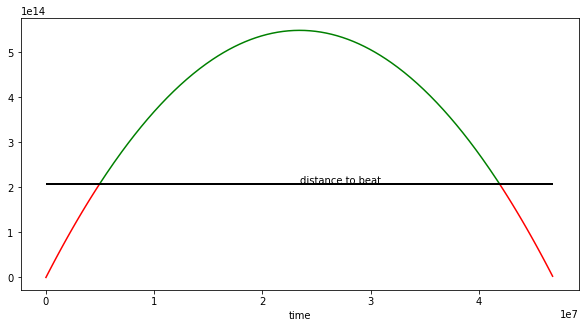

In [57]:
from matplotlib import pyplot as plt

fix, ax = plt.subplots(figsize=(10,5))

df[df['is_winning']].sort_values('time').plot(x='time', y='distance', ax=ax, color='g')
df[~(df['is_winning']) & (df['time'] < time_min) ].sort_values('time').plot(x='time', y='distance', ax=ax, color='r')
df[~(df['is_winning']) & (df['time'] > time_max) ].sort_values('time').plot(x='time', y='distance', ax=ax, color='r')

ax.hlines(y=distance_to_beat, xmin=0, xmax=time_available, linewidth=2, color='k')
ax.annotate("distance to beat", ((time_available // 2), distance_to_beat))
ax.set_ylabel = 'distance'
ax.get_legend().remove()